# Camera calibration
- intrinsic parameters
- evaluate depth estimation

## Import Library

In [8]:
# import function
import stereo2

# import basic module
import os
import time
from ximea import xiapi
import cv2
import time
import numpy as np
import pandas as pd
from scipy import linalg
from scipy.spatial.transform import Rotation
import glob
import matplotlib.pyplot as plt
import triangulation as tri
import dlt

## Calibration

### Main process

In [9]:
import stereo2

#SRC = r"C:\Users\kawaw\data_tracking\20240109\calibration\camera"
SRC = r"C:\Users\kawaw\data_tracking\calibration\0405"
SRC_LEFT = os.path.join(SRC,"left_calibration")
SRC_RIGHT = os.path.join(SRC,"right_calibration")
SRC_STEREO = os.path.join(SRC,"stereoCalibration")
BASELINE = 208 #
CHECKERBOARD = (4, 3)
CHECKERSIZE = 48  # [mm]
CRITERIA = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
IMG_SIZE = (640,640)
num_left = len(glob.glob(os.path.join(SRC_LEFT, '*.png')))
num_right = len(glob.glob(os.path.join(SRC_RIGHT, '*.png')))
num_stereo = len(glob.glob(os.path.join(os.path.join(SRC_STEREO,"left"), '*.png')))
#SAVEFile = r"C:\Users\kawaw\data_tracking\20240109\calibration\camera\calibration_0109.csv"
SAVEFile = r"C:\Users\kawaw\data_tracking\calibration\0405\calibration_0405.csv"
# calibration = stereo.StereoVision(baseline=BASELINE,checker_board=CHECKERBOARD,check_size=CHECKERSIZE,criteria=CRITERIA,src=SRC)
calibration = stereo2.StereoVision(
    baseline=BASELINE,
    checker_board=CHECKERBOARD,
    check_size=CHECKERSIZE,
    end_left=num_left,
    end_right = num_right,
    end_stereo=num_stereo,
    criteria=CRITERIA,
    src_left=SRC_LEFT,
    src_right=SRC_RIGHT,
    src_stereo=SRC_STEREO,
    img_size=IMG_SIZE,
    savePath=SAVEFile,
)

calibrate camera (intrinsic) 
--- Left ---

0.png
100.png
RMSE : 
 0.2523845561916883
Camera matrix : 

[[754.66874569   0.         255.393104  ]
 [  0.         754.64708568 335.6848201 ]
 [  0.           0.           1.        ]]
distCoeffs : 

[[-0.00661832 -0.19633213  0.00759942 -0.01391234  0.73355661]]
calibration result (LEFT) :

1 :: average error for one edge : 0.16 [pixel]
2 :: average error for one edge : 0.13 [pixel]
3 :: average error for one edge : 0.11 [pixel]
4 :: average error for one edge : 0.10 [pixel]
5 :: average error for one edge : 0.15 [pixel]
6 :: average error for one edge : 0.16 [pixel]
7 :: average error for one edge : 0.13 [pixel]
8 :: average error for one edge : 0.11 [pixel]
9 :: average error for one edge : 0.12 [pixel]
10 :: average error for one edge : 0.09 [pixel]
11 :: average error for one edge : 0.15 [pixel]
12 :: average error for one edge : 0.15 [pixel]
13 :: average error for one edge : 0.17 [pixel]
14 :: average error for one edge : 0.09 [pixel

### Result

### 20240405

In [10]:
BASELINE = 208 #
CHECKERBOARD = (4, 3)
CHECKERSIZE = 48  # [mm]
CRITERIA = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
IMG_SIZE = (640,640)
K_left = np.array([[754.66874569,0, 255.393104],[0, 754.64708568, 335.6848201], [0, 0, 1]])
K_right = np.array([[802.62616415,0, 286.48516862],[0, 802.15806832, 293.54957668], [0, 0, 1]])
dist_left = np.array([[-0.00661832 ,-0.19633213  ,0.00759942 ,-0.01391234 ,0.73355661]])
dist_right = np.array([[0.00586444 ,-0.18180071 , 0.00489287 ,-0.00392576  ,1.20394993]])
R0 = np.eye(3, dtype=np.float32)
T0 = np.array([0.0, 0.0, 0.0]).reshape((3, 1))
R1 = np.array([[ 0.98244287 ,-0.06210902  ,0.17592181],[0.08393148 ,0.98928591 ,-0.11945249], [-0.16661789,0.13212062,0.97712979]])
T1 = np.array([-510.97553847,251.62759119,-27.61766548]).reshape((3, 1))
RT_left = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0]])
RT_right = np.array([[ 0.9983483 ,  0.00312181, -0.05736654,-209.5785972], [-0.00260072,  0.9999547  , 0.00915595,-2.146], [ 0.05739252, -0.00899163,  0.9983112 ,-32.0618]])
# Projection matrices
P_left = np.dot(K_left, RT_left)
P_right = np.dot(K_left, RT_right)
print("projection matrix :: left=",P_left)
print("projection matrix :: right=",P_right)

projection matrix :: left= [[754.66874569   0.         255.393104     0.        ]
 [  0.         754.64708568 335.6848201    0.        ]
 [  0.           0.           1.           0.        ]]
projection matrix :: right= [[ 7.68079913e+02  5.95321413e-02  2.11669061e+02 -1.66350780e+05]
 [ 1.73031720e+01  7.51594546e+02  3.42027427e+02 -1.23821322e+04]
 [ 5.73925200e-02 -8.99163000e-03  9.98311200e-01 -3.20618000e+01]]


### 20240119

In [2]:
BASELINE = 208 #
CHECKERBOARD = (4, 3)
CHECKERSIZE = 48  # [mm]
CRITERIA = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
IMG_SIZE = (640,640)
K_left = np.array([[730.25148157,0, 288.85867563],[0, 731.26322, 316.97], [0, 0, 1]])
K_right = np.array([[711.09014068,0,328.7285947],[0, 711.3316976 ,292.3936764], [0, 0, 1]])
dist_left = np.array([[-0.07035893  ,0.08862611 , 0.00269166 ,-0.00647377, -0.03912241]])
dist_right = np.array([[-0.01536099, - 0.5479646,0.00284138,  0.00928712, 1.63641792]])
R0 = np.eye(3, dtype=np.float32)
T0 = np.array([0.0, 0.0, 0.0]).reshape((3, 1))
R1 = np.array([[ 0.9983483 ,  0.00312181, -0.05736654], [-0.00260072,  0.9999547  , 0.00915595], [ 0.05739252, -0.00899163,  0.9983112]])
T1 = np.array([-209.5786,-2.146,-32.0618]).reshape((3, 1))
RT_left = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0]])
RT_right = np.array([[ 0.9983483 ,  0.00312181, -0.05736654,-209.5785972], [-0.00260072,  0.9999547  , 0.00915595,-2.146], [ 0.05739252, -0.00899163,  0.9983112 ,-32.0618]])
# Projection matrices
P_left = np.dot(K_left, RT_left)
P_right = np.dot(K_left, RT_right)
print("projection matrix :: left=",P_left)
print("projection matrix :: right=",P_right)

projection matrix :: left= [[730.25148157   0.         288.85867563   0.        ]
 [  0.         731.26322    316.97         0.        ]
 [  0.           0.           1.           0.        ]]
projection matrix :: right= [[ 7.45623653e+02 -3.17603956e-01  2.46478850e+02 -1.62306410e+05]
 [ 1.62898962e+01  7.28380017e+02  3.23130111e+02 -1.17319196e+04]
 [ 5.73925200e-02 -8.99163000e-03  9.98311200e-01 -3.20618000e+01]]


### Undistort image

(4096, 2)


C:\Users\kawaw\AppData\Local\Temp\ipykernel_26436\572962799.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


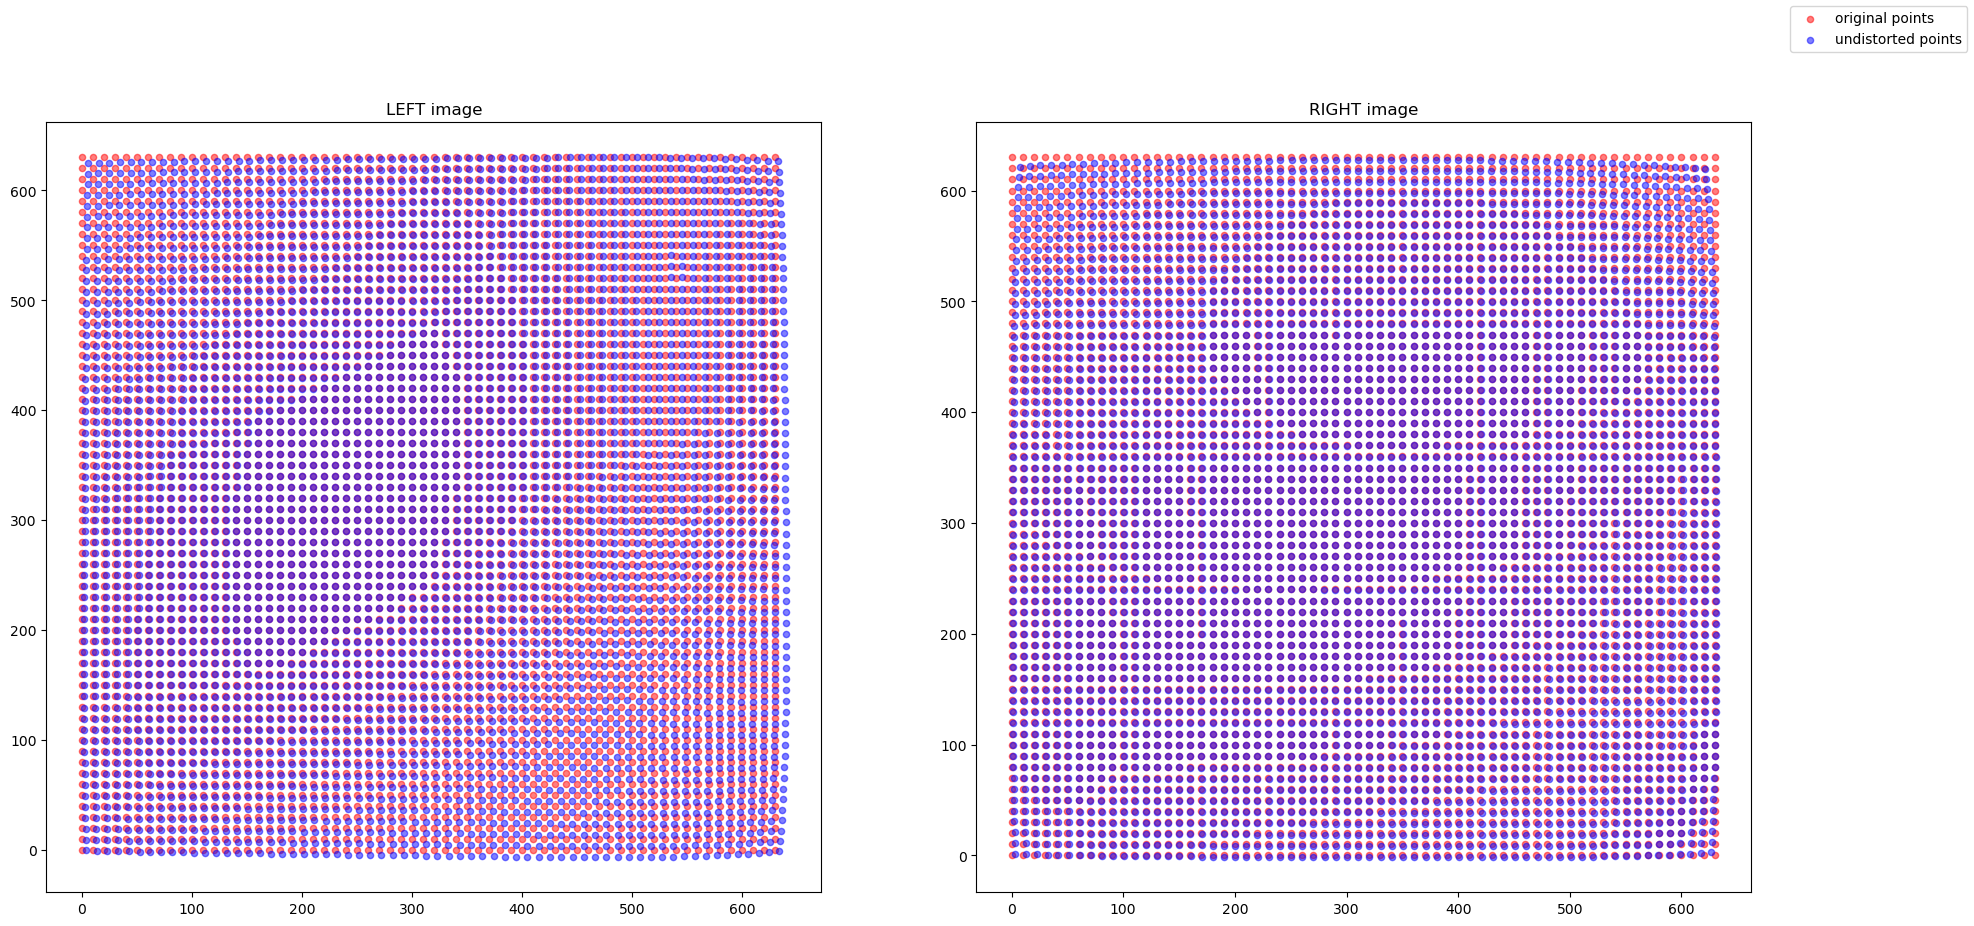

In [11]:
w,h=np.meshgrid(range(0, 640, 10), range(0, 640, 10))
pts = (np.vstack((w.flatten(), h.flatten())).T).astype('float32')
print(pts.shape)
pts_new_left = cv2.undistortPoints(np.array([pts]), K_left, dist_left, P=K_left)
pts_new_left = np.squeeze(pts_new_left)
pts_new_right = cv2.undistortPoints(np.array([pts]), K_right, dist_right, P=K_right)
pts_new_right = np.squeeze(pts_new_right)
fig,ax = plt.subplots(1,2,figsize=(22,10))
ax[0].scatter(pts[:,0], pts[:,1], 20, 'r', alpha=.5,label="original points")
ax[0].scatter(pts_new_left[:,0], pts_new_left[:,1], 20, 'b', alpha=.5,label="undistorted points")
ax[0].set_title("LEFT image")
ax[1].scatter(pts[:,0], pts[:,1], 20, 'r', alpha=.5)
ax[1].scatter(pts_new_right[:,0], pts_new_right[:,1], 20, 'b', alpha=.5)
ax[1].set_title("RIGHT image")
fig.legend()
fig.show()
fig.savefig("calibration.png")

## Triangulation

### 1. triangulation method

#### param setting

In [20]:
#rootDir = r"C:\Users\kawaw\data_tracking\20240109\depth"
rootDir = r"C:\Users\kawaw\data_tracking\calibration\0405\depth"
DEPTH = 300
numIndex = 20
BASELINE = 208
date="0405" #"0119"

#### main process

In [21]:
# load image
left = "{dist}".format(dist=DEPTH)
right = "{dist}".format(dist=DEPTH)
if date=="0119":
    leftDir = os.path.join(rootDir, left, "left")
    rightDir = os.path.join(rootDir, right, "right")
    img_left = cv2.imread(os.path.join(leftDir, f"{numIndex}.png"))
    img_right = cv2.imread(os.path.join(rightDir, f"{numIndex}.png"))
elif date=="0405":
    Dir = os.path.join(rootDir, f"{DEPTH}")
    print(Dir)
    img_left = cv2.imread(os.path.join(Dir, "left.png"))
    img_right = cv2.imread(os.path.join(Dir, "right.png"))
#select ROI
print("select roi")
roi_left = cv2.selectROI(
    "Select ROI left", img_left, fromCenter=False, showCrosshair=True
)
print(roi_left)
roi_right = cv2.selectROI(
    "Select ROI right", img_right, fromCenter=False, showCrosshair=True
)
xl = roi_left[0] + roi_left[2] / 2
yl = roi_left[1] + roi_left[3] / 2
xr = roi_right[0] + roi_right[2] / 2
yr = roi_right[1] + roi_right[3] / 2

#calculate 3d position
points_mean = tri.reconstruction_mean((xl,yl),(xr,yr),K_left,K_right,dist_left,dist_right,baseline=BASELINE) #mean is better
print("=== use mean camera matrix :: (X,Y,Z) = ", points_mean)
points = tri.reconstruction((xl,yl),(xr,yr),K_left,K_right,dist_left,dist_right,baseline=BASELINE)
print("=== use left camera matrix :: (X,Y,Z) = ", points)

C:\Users\kawaw\data_tracking\calibration\0405\depth\300
select roi
(303, 241, 53, 74)
=== use mean camera matrix :: (X,Y,Z) =  [208.23, -130.36, 2746.71]
=== use left camera matrix :: (X,Y,Z) =  [263.07, -204.64, 2662.13]


### Method by DLT (Direct Linear Transformation) or cv2.triangulatePoints()

#### Params setting

In [9]:
method = "dlt" # "triangle"

rootDir = r"C:\Users\kawaw\data_tracking\20240109\depth"
DEPTH = 100
numIndex = 20
BASELINE = 208
cam_left_param = [K_left, dist_left, R0, T0]
cam_right_param = [K_right, dist_right, R1, T1]
# make instance of DLTs
instance_dlt = dlt.DLT(cam_left_param=cam_left_param, cam_right_param=cam_right_param)

#### main process

In [10]:
left = "{dist}".format(dist=DEPTH)
right = "{dist}".format(dist=DEPTH)
leftDir = os.path.join(rootDir, left, "left")
rightDir = os.path.join(rootDir, right, "right")
img_left = cv2.imread(os.path.join(leftDir, f"{numIndex}.png"))
img_right = cv2.imread(os.path.join(rightDir, f"{numIndex}.png"))
# select rois

roi_left = cv2.selectROI("Select ROI left", img_left, fromCenter=False, showCrosshair=True)
print(roi_left)
roi_right = cv2.selectROI("Select ROI right", img_right, fromCenter=False, showCrosshair=True)
print(roi_right)
xl = roi_left[0] + roi_left[2] / 2
yl = roi_left[1] + roi_left[3] / 2
xr = roi_right[0] + roi_right[2] / 2
yr = roi_right[1] + roi_right[3] / 2
left = np.array([[xl,yl]]).reshape((1, -1, 2))
right = np.array([[xr,yr]]).reshape((1, -1, 2))
#undistort points
# Use cv2.undistortPoints() to undistort the points
undistorted_left = cv2.undistortPoints(left, K_left, dist_left,P=K_left)
undistorted_right = cv2.undistortPoints(right, K_right, dist_right,P=K_right)
undistorted_left = undistorted_left.reshape((-1, 2))
undistorted_right = undistorted_right.reshape((-1, 2))
#calculate 3d position
for left, right in zip(undistorted_left,undistorted_right):
  if method == "dlt":
    data_3d = instance_dlt.main(point1=left, point2=right)
  elif method=="triangle":
    data_3d = cv2.triangulatePoints(instance_dlt.p_left, instance_dlt.p_right, left, right)
    data_3d = data_3d[:3] / data_3d[3]
  print("-- XYZ position == ", data_3d)
cv2.destroyAllWindows()

(307, 125, 174, 252)
(128, 104, 177, 254)
-- XYZ position ==  [125.88072289 -78.78170183 869.36638046]
